# Modélisation de la trajectoire d'un volant
## Comparaison de la trajectoire calculée avec la trajectoire mesurée expérimentalement
La cellule de code suivante permet de calculer et de tracer la trajectoire du volant et de la comparer à une trajectoire mesurée expérimentalement et contenue dans un fichier CSV.  
Pour exécuter la cellule suivante, il suffit de sélectionner la cellule et d'appuyer sur <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> (ou <kbd>MAJ</kbd>+<kbd>ENTRÉE</kbd>).  
Tu vas voir apparaître une figure qui correspond à la trajectoire du volant de badminton, animé d'une vitesse initiale $v_0$ et dont la direction forme un angle $\theta_0$ avec l'horizontale. A l'aide des curseurs, tu pourras faire varier les valeurs de $v_0$, de $\theta_0$ et de $Cx$ qui correspond au coefficient de traînée du volant.

In [2]:
#%matplotlib notebook
#%matplotlib widget
#%matplotlib inline

# Chargement des bibliothèques
from ipywidgets import interact
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Nom des fichiers CSV contenant la trajectoire du volant mesurée expérimentalement  
nom_fichier_csv1="2026-02-05 09-29-41.csv"   # 31°
nom_fichier_csv2="2026-01-29 09-13-59.csv"   # 32°
nom_fichier_csv3="2026-02-05 08-44-54.csv"   # 33°
nom_fichier_csv4="2025-12-28 15-31-49.csv"   # 36°
nom_fichier_csv5="2025-12-14 11-49-08.csv"   # 37°
nom_fichier_csv6="2026-02-05 08-39-02.csv"   # 38°
nom_fichier_csv7="2026-02-05 09-06-54.csv"   # 38°
nom_fichier_csv8="2025-12-14 11-20-34.csv"   # 40°
nom_fichier_csv9="2026-02-05 09-20-21.csv"   # 47°
nom_fichier_csv10="2026-02-05 09-11-59.csv"  # 49°
nom_fichier_csv11="2025-12-28 16-05-32.csv"  # 52°

# Lecture du fichier CSV
data = np.genfromtxt(nom_fichier_csv2, delimiter=",",skip_header=1)
t_exp = data[:, 0]
x_exp = data[:, 1]
y_exp = data[:, 2]

# Vitesse initiale expérimentale calculée sur les deux premiers points du pointage
v0_exp=np.sqrt((x_exp[1]-x_exp[0])**2 +(y_exp[1]-y_exp[0])**2)/(t_exp[1]-t_exp[0])

# Angle de tir expérimental calculé sur le 1er et le 3eme point du pointage
theta0_exp=(180/np.pi)*np.arctan((y_exp[2]-y_exp[0])/(x_exp[2]-x_exp[0]))

# Paramètres physiques
m = 5E-3 # kg     Masse du volant
g = 9.81 # m/s²   Intensité de la pesanteur
T = 17.5   # °C     Température de l'air
rho=1.292*(273.15/(17.5+273.15)) # kg/m³  Masse volumique de l'air
#rho = 1.21 # kg/m³
S = 2.8E-3 # m²   Surface frontale du volant

# Calcul de la trajectoire par résolution de la deuxième loi de Newton
def solve(v0 = v0_exp, theta0 = theta0_exp, Cx = 0.62):
    theta0 = theta0 * np.pi / 180
    
    def loi_de_newton(dAdt, t):
        x = dAdt[0] ; vx = dAdt[1] ; y = dAdt[2] ; vy = dAdt[3]
        return [vx, 
                - 0.5 * rho * S * Cx * np.sqrt(vx**2 + vy**2) * vx / m,
                vy, 
                -g - 0.5 * rho * S * Cx * np.sqrt(vx**2 + vy**2) * vy / m]
    
    dAdt0 = [0, v0 * np.cos(theta0), 0, v0 * np.sin(theta0)]
    
    t = np.linspace(0, 3, 300)
    
    sol = odeint(loi_de_newton, dAdt0, t)

    x = sol[:, 0]
    y = sol[:, 2]
    
    fig, ax = plt.subplots(figsize = (14, 10))
        
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 4)
    
    ax.set_aspect('equal')
    
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(r"Valeurs expérimentales : $v_0$ = {:.2f} m/s, $\theta_0$ = {:.2f}°".format(v0_exp, theta0_exp))
     
    ax.plot(x[y >= -1], y[y >= -1], label="Simulation")
    ax.plot(x_exp, y_exp, "+", label="Expérience")

    ax.legend()
    ax.grid()
    
    plt.show()
    plt.close(fig)
    
interact(solve, v0 = (14, 20., 0.1), theta0 = (0, 90., 0.5), Cx = (0.5, 0.80, .001));


interactive(children=(FloatSlider(value=18.460296979222857, description='v0', max=20.0, min=14.0), FloatSlider…

## Portée du volant
La cellule de code ci-dessous permet de tracer la portée du volant en fonction de l'angle de tir $\theta_0$.  
Plus précisément, elle calcule pour différentes valeurs de $\theta_0$, la valeur de $x$ pour laquelle $y$ est égale à une certaine valeur $y_0$.

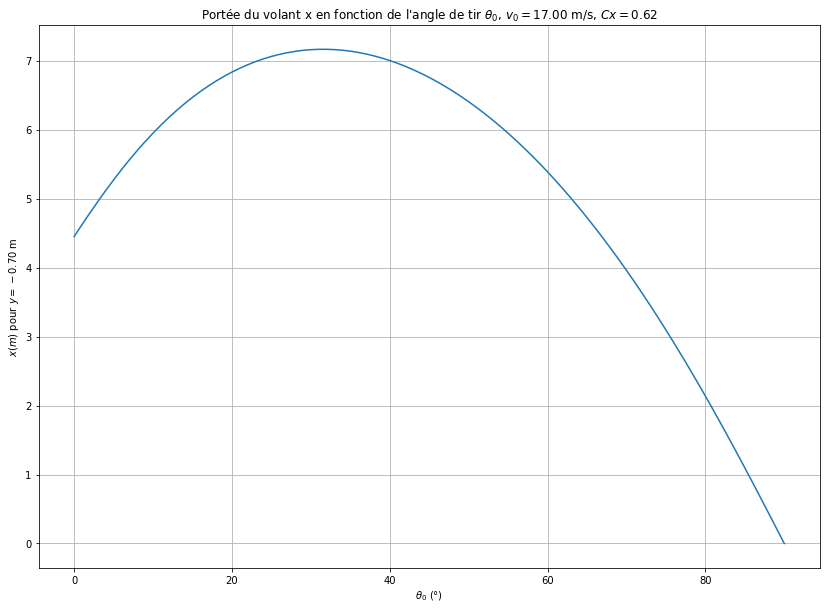

In [5]:
#%matplotlib notebook
#%matplotlib widget
y_0 = -0.7 # m
v0_moy = 17 # m/s  
Cx_moy = 0.62 # sans unité

def x_pour_y0(theta0, y0=y_0,v0=v0_moy, Cx=Cx_moy):
    theta0 = theta0 * np.pi / 180

    def loi_de_newton(dAdt, t):
        x, vx, y, vy = dAdt
        v = np.sqrt(vx**2 + vy**2)
        return [
            vx,
            -0.5 * rho * S * Cx * v * vx / m,
            vy,
            -g - 0.5 * rho * S * Cx * v * vy / m
        ]

    dAdt0 = [0, v0*np.cos(theta0), 0, v0*np.sin(theta0)]
    t = np.linspace(0, 3, 300)
    sol = odeint(loi_de_newton, dAdt0, t)

    x = sol[:, 0]
    y = sol[:, 2]

    # Recherche du passage y=y0 (hors point initial)
    for i in range(1, len(y)):
        if y[i-1] > y0 and y[i] <= y0:
            # interpolation linéaire
            x0 = x[i-1] + (y0 - y[i-1]) * (x[i] - x[i-1]) / (y[i] - y[i-1])
            return x0

    return np.nan  # si le volant ne retombe pas dans la fenêtre de temps


theta_vals = np.linspace(0, 90, 91)  # degrés
x_vals = [x_pour_y0(theta) for theta in theta_vals]
plt.figure(figsize=(14,10))
plt.plot(theta_vals, x_vals, '-')
plt.xlabel(r'$\theta_0$ (°)')
plt.ylabel(r'$x (m) $ pour $y={:.2f}$ m'.format(y_0))
plt.title(r"Portée du volant x en fonction de l'angle de tir $\theta_0$, $v_0={:.2f}$ m/s, $Cx={:.2f}$".format(v0_moy,Cx_moy))
plt.grid()


plt.show()

